In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Thresholding

- If the pixel value is smaller than or equal to the threshold, it is set to 9, else it is set to a maximum value.
- image should be grayscale

In [ ]:
img = cv.imread("dog.jpeg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img.shape, gray.shape

((178, 283, 3), (178, 283))

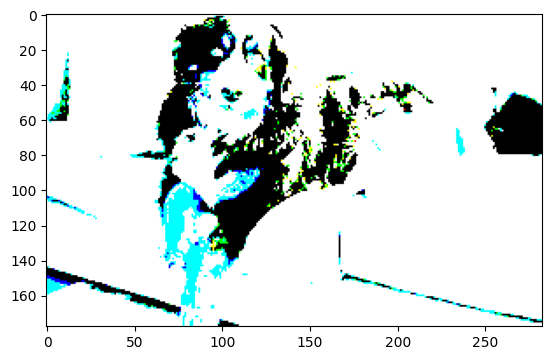

In [ ]:
# cv.THRESH_BINARY
# maxval, or 0
ret, thresh = cv.threshold(img, thresh=40, maxval=255, type=cv.THRESH_BINARY)
plt.imshow(thresh)

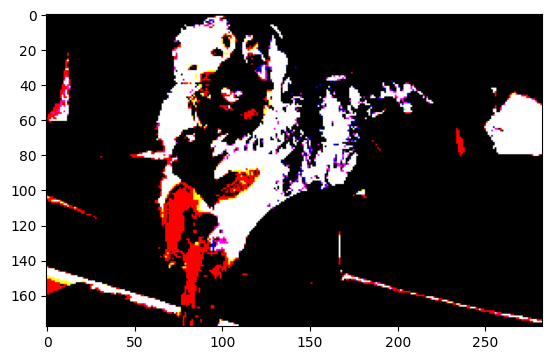

In [ ]:
# cv.THRESH_BINARY_INV
# 0 or maxval
ret, thresh = cv.threshold(img, thresh=40, maxval=255, type=cv.THRESH_BINARY_INV)
plt.imshow(thresh)

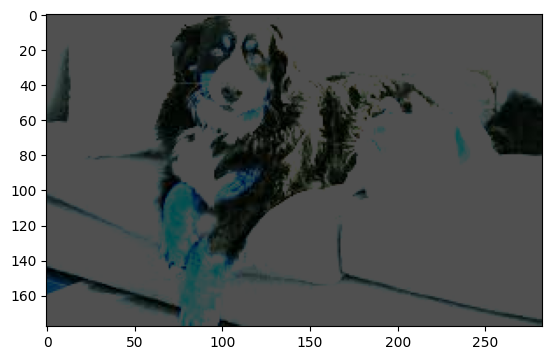

In [ ]:
# cv.THRESH_TRUNC
# threshold if > thresh, else source(as it is)
ret, thresh = cv.threshold(img, thresh=80, maxval=255, type=cv.THRESH_TRUNC)
plt.imshow(thresh)

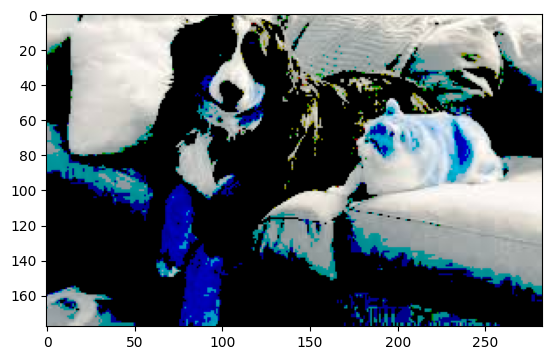

In [ ]:
# cv.THRESH_TOZERO
# same as org if > thresh, else 0
ret, thresh = cv.threshold(img, thresh=140, maxval=255, type=cv.THRESH_TOZERO)
plt.imshow(thresh)

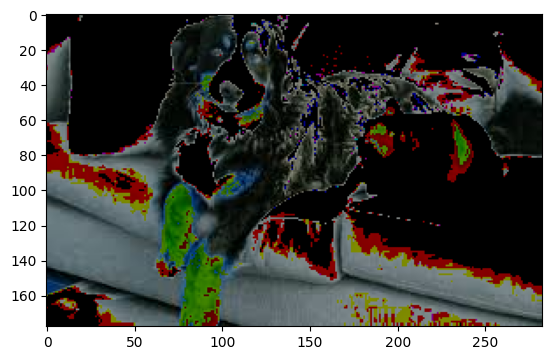

In [ ]:
# cv.THRESH_TOZERO_INV
# 0 if > thresh, else same as org
ret, thresh = cv.threshold(img, thresh=140, maxval=255, type=cv.THRESH_TOZERO_INV)
plt.imshow(thresh)

## Adaptive Thresholding

Instead of using a global value, using algorithm to determine the threshold for a pixel based on a small region around it.
- i.e. different thresholds for different regions of the image, better for images with varying illumination.

In [ ]:
type(img)

numpy.ndarray

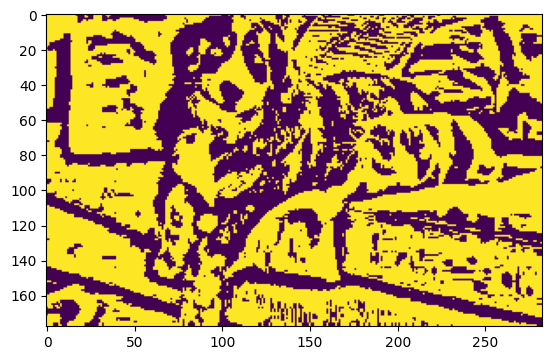

In [ ]:
# cv.ADAPTIVE_THRESH_MEAN_C: thres = mean of neighborhood - C
# requires image to be of type int8
# blockSize % 2 == 1
thresh = cv.adaptiveThreshold(gray,
                              maxValue=255,
                              adaptiveMethod=cv.ADAPTIVE_THRESH_MEAN_C,
                              thresholdType=cv.THRESH_BINARY,
                              blockSize=19,
                              C=2
)

plt.imshow(thresh)

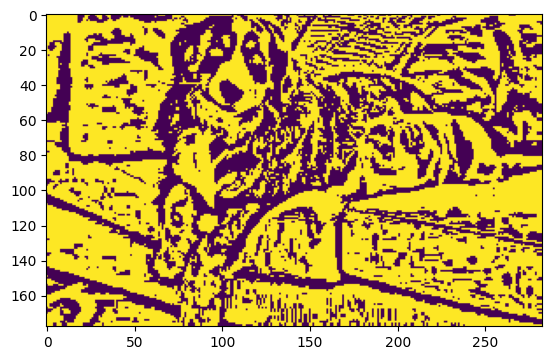

In [ ]:
# cv.ADAPTIVE_THRESH_GAUSSIAN_C: thres = gaussian-weighted sum of the neighbourhood values - C
# requires image to be of type int8
# blockSize % 2 == 1
thresh = cv.adaptiveThreshold(gray,
                              maxValue=255,
                              adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                              thresholdType=cv.THRESH_BINARY,
                              blockSize=19,
                              C=2
)

plt.imshow(thresh)

### Otsu's Binarization

- rather than choosing threshold, it determines the threshold automatically
- determines the optimal global theshold from the image histogram.

- determined by minimizing intra-class intensity variance, or equivalently, by maximixing inter-class variance.

    - Intra-class variance: weighted sum of variances of the two classes

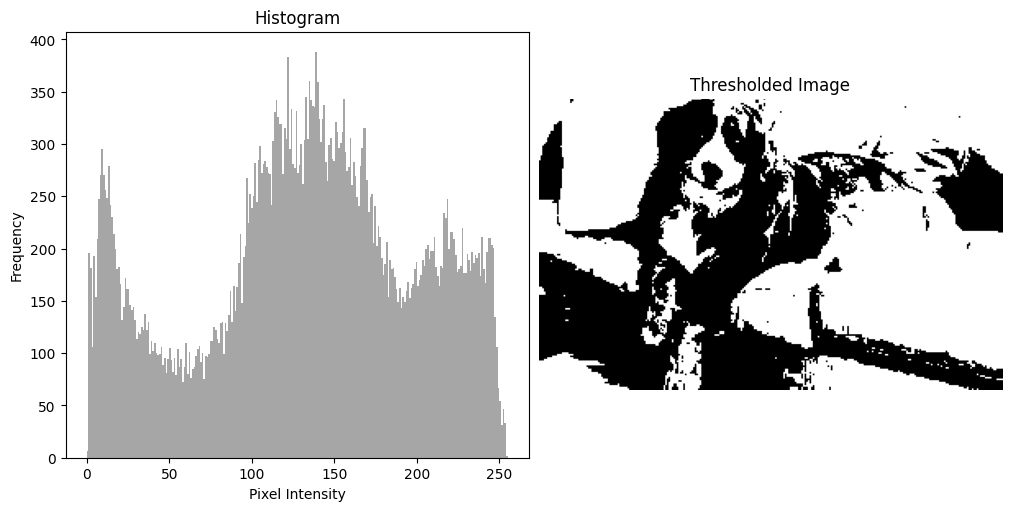

In [ ]:
ret, thresh = cv.threshold(gray, thresh=0, maxval=255, type=cv.THRESH_OTSU)

# Create a grid with proper spacing and size
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Plot the histogram
axes[0].hist(gray.ravel(), bins=256, color='gray', alpha=0.7)
axes[0].set_title("Histogram")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

# Plot the thresholded image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title("Thresholded Image")
axes[1].axis('off')  # Hide axes for the image

# Display the grid
plt.show()

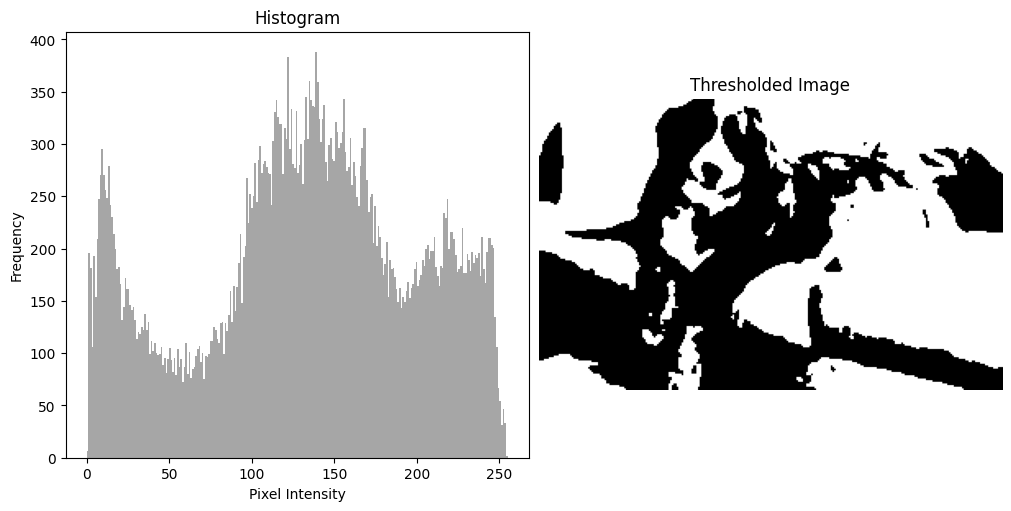

In [ ]:
# with gaussian filtering
filtered = cv.GaussianBlur(gray, (5, 5), 0)

ret, thresh = cv.threshold(filtered, thresh=0, maxval=255, type=cv.THRESH_OTSU)

# Create a grid with proper spacing and size
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# Plot the histogram
axes[0].hist(gray.ravel(), bins=256, color='gray', alpha=0.7)
axes[0].set_title("Histogram")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

# Plot the thresholded image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title("Thresholded Image")
axes[1].axis('off')  # Hide axes for the image

# Display the grid
plt.show()

In [ ]:
ret

127.0